In [2]:
from qubit import LogicalQubit, PhysicalQubit
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np

In [19]:
class VirtualSimPyEnv:
    def __init__(self, time=0):
        self.now = time

node = 'DummyNode'
qubitID = 'Qubit1'
qnic = 'QNIC1'
role = 'Physical'
env = VirtualSimPyEnv()
table = 'Table1'

# Error
memoryFunction = [1, 0, 0, 0]
gateError = [1, 0] # Perfect, Error
measurementError = 0

In [9]:
qubit = PhysicalQubit(node, qubitID, qnic, role, env, table, memoryFunction, gateError, measurementError)
qubit.initiateTime = 0
qubit.error_x = True

In [10]:
qubit.measureZ() 

True

In [29]:
# create logical qubit

PhysicalQubits = [PhysicalQubit('Damm', i, 'boy!', 'encoding_qubit', env, 'test', memoryFunction, gateError, measurementError) for i in range(7)]
logicalQubit = LogicalQubit('Damn', 'Steane', 'girl!', env)
logicalQubit.physical_list = PhysicalQubits
for qubit in logicalQubit.physical_list:
    qubit.initiateTime = 0

logicalQubit.encode()

AncillaQubits = [PhysicalQubit('Damm', i, 'boy!', 'detecting_qubit', env, 'test', memoryFunction, gateError, measurementError) for i in range(6)]
for qubit in AncillaQubits:
    qubit.initiateTime = 0
logicalQubit.ancilla_list = AncillaQubits

# assign error
logicalQubit.physical_list[2].error_x = True # error happen at second physical qubit (error occour after encode)
logicalQubit.physical_list[5].error_z = True # error happen at second physical qubit (error occour after encode)

for qubit in logicalQubit.physical_list:
    print(qubit.error_x, qubit.error_z)

False False
False False
True False
False False
False False
False True
False False


In [30]:
logicalQubit.error_detection_correction(return_syndrome=True, correction=True) # (-1, -1) no error

(2, 5)

In [31]:
for qubit in logicalQubit.physical_list:
    print(qubit.error_x, qubit.error_z)

False False
False False
False False
False False
False False
False False
False False


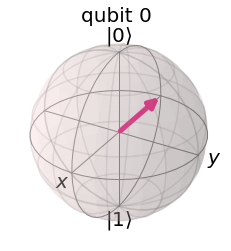

In [9]:
sim = Aer.get_backend('aer_simulator')
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

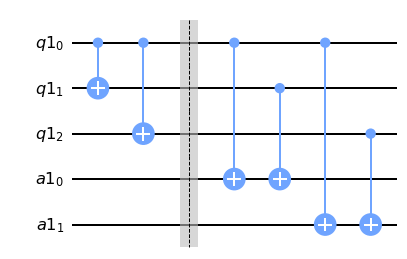

In [3]:
qc1 = QuantumRegister(3)
anc = AncillaRegister(2)
qc = QuantumCircuit(qc1, anc)
initial_state = [1/np.sqrt(2), -1/np.sqrt(2)]
qc.initialize(initial_state, 0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)
qc.barrier()
qc.C3XGate

qc.draw('mpl')

In [13]:
from qiskit_textbook.widgets import gate_demo

gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…